In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
%matplotlib inline
from pylab import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
retail_df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [ ]:
retail_df.shape

(541909, 8)

In [ ]:
retail_df.duplicated().sum()

5268

In [ ]:
# data contains duplicated values so dropping these duplicated values

In [ ]:
retail_df.drop_duplicates(inplace=True)

In [ ]:
retail_df.duplicated().sum()

0

In [ ]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# two features has null values so dropping these null values

In [ ]:
retail_df.dropna(inplace=True)

In [ ]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
# InvoiceNo starting with C represents cancelled items so checking number of items cancelled

In [ ]:
retail_df['InvoiceNo']  =retail_df['InvoiceNo'].astype('str')
cancelled_items = retail_df[retail_df["InvoiceNo"].str.startswith('C')]
cancellation_percentage = len(cancelled_items)*100/len(retail_df)
print('Total number of cancelled items are', len(cancelled_items))
print(cancellation_percentage,'percent items were cancelled')

Total number of cancelled items are 8872
2.209141343213713 percent items were cancelled


In [ ]:
# dropping InvoiceNo starting with C
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [ ]:
retail_df.shape

(392732, 8)

In [ ]:
# after data cleaning now we do EDA.

In [ ]:
description_df = retail_df['Description'].value_counts().reset_index()
description_df.rename(columns={'index':'Item_Name','Description':'Count'},inplace=True)


In [ ]:
description_df.head()

,Item_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

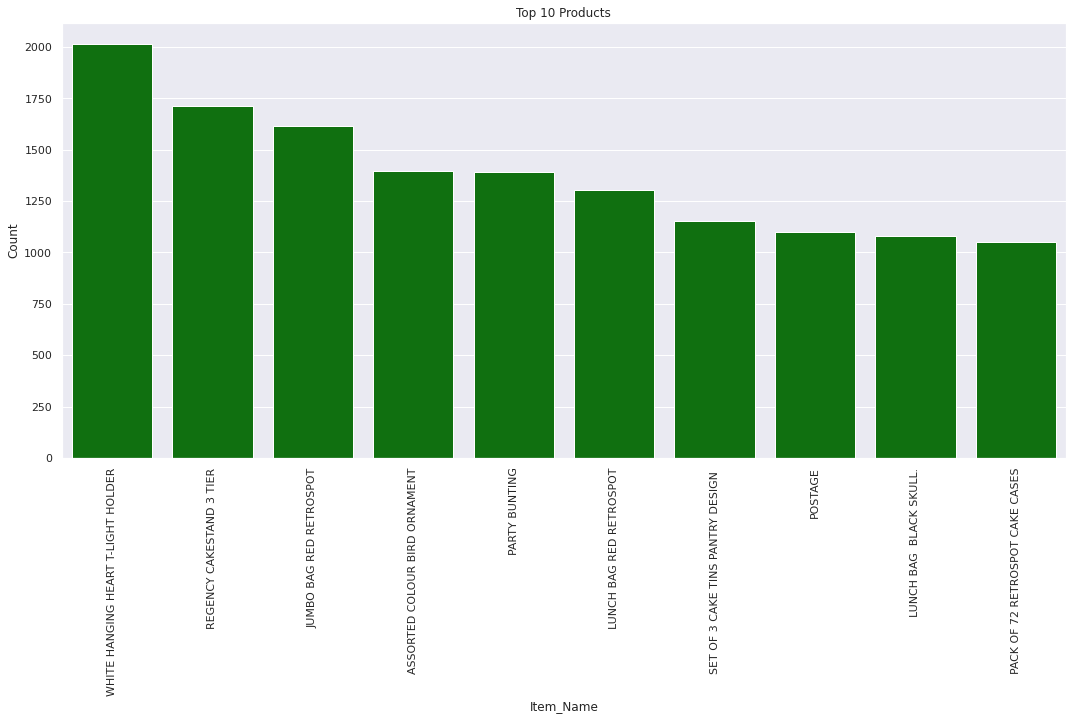

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='Item_Name',y='Count',data=description_df[:10],color='Green')
plt.title('Top 10 Products')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

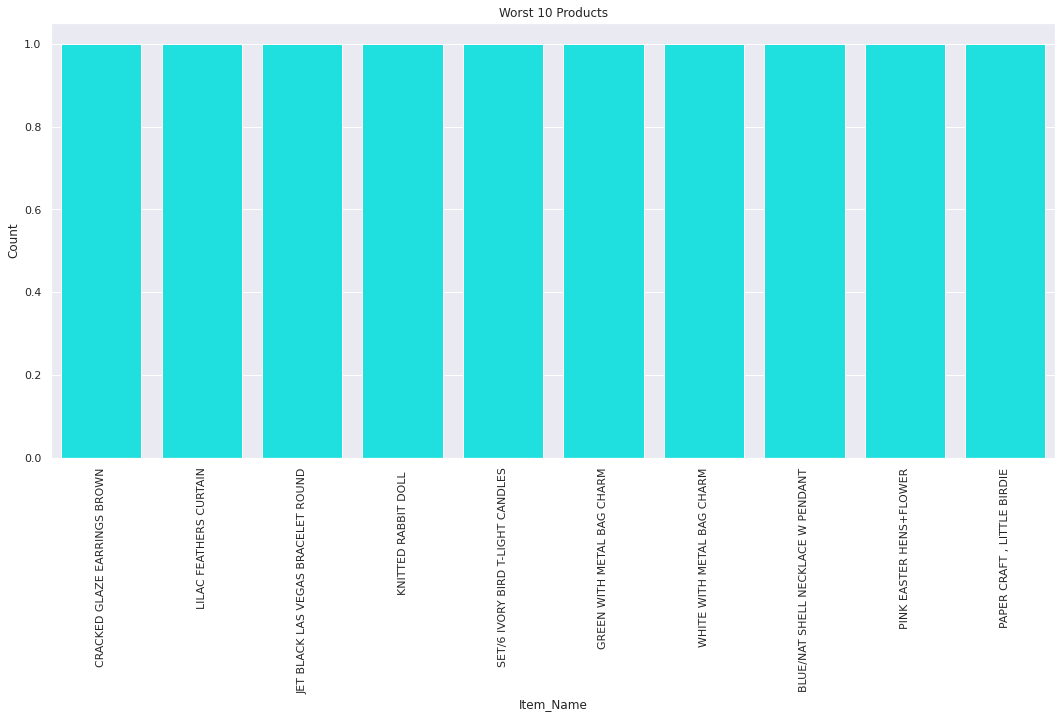

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='Item_Name',y='Count',data=description_df[-10:],color='Cyan')
plt.title('Worst 10 Products')
plt.xticks(rotation='vertical')

In [ ]:
stockcode_df = retail_df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index':'StockCode','StockCode':'Count'},inplace=True)
stockcode_df.head()

,StockCode,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


Text(0.5, 1.0, 'Top 10 Stocks')

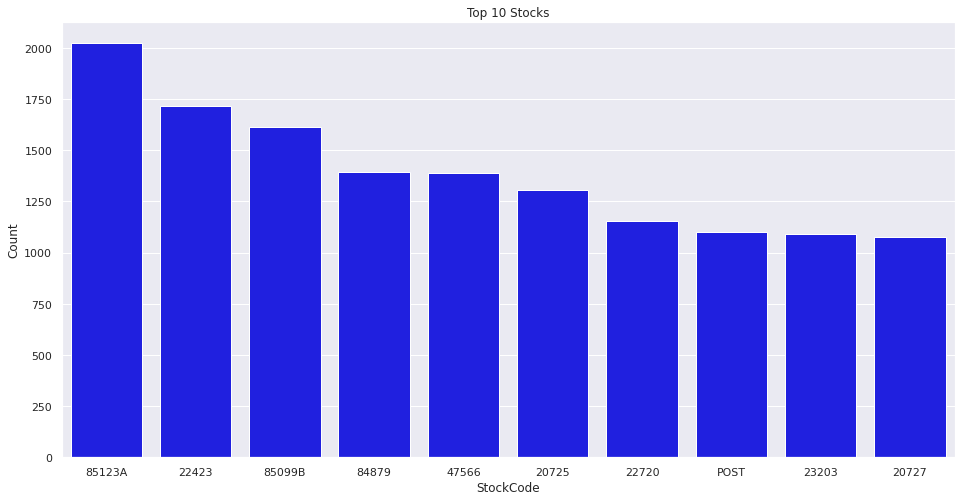

In [ ]:
# top 10 StockCodes
plt.figure(figsize=(16,8))
sns.barplot(x='StockCode',y='Count',data=stockcode_df[:10],color='Blue')
plt.title('Top 10 Stocks')

In [ ]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%y-%m-%d %H:%M:%S')


In [ ]:
retail_df['Day'] =  retail_df['InvoiceDate'].dt.day_name()
retail_df['Year']  =retail_df['InvoiceDate'].apply(lambda x: x.year)
retail_df['Month'] = retail_df['InvoiceDate'].dt.month_name()
retail_df['Hour']  = retail_df['InvoiceDate'].apply(lambda x: x.hour)
retail_df['Minute'] = retail_df['InvoiceDate'].apply(lambda x: x.minute)

In [ ]:
# Extracted Day, Month, Year and Time from Invoice date

In [ ]:

day_df = retail_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index':'Day','Day':'Count'},inplace=True)
day_df

,Day,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


Text(0.5, 1.0, 'Order on Days')

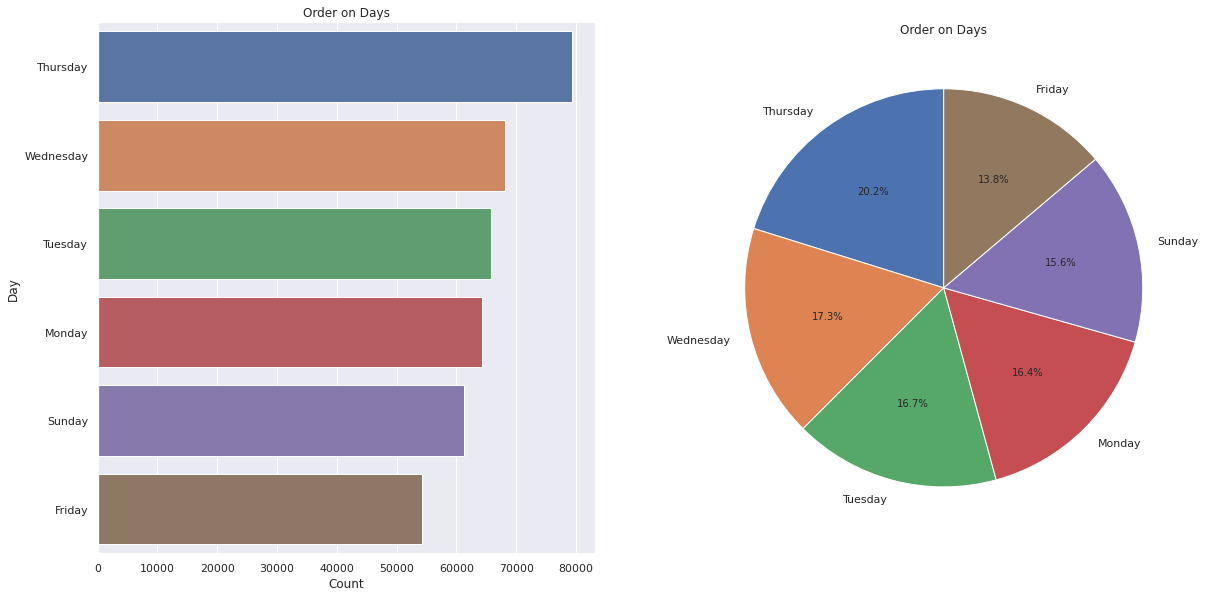

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
fig.tight_layout()
plt.subplot(1,2,1)
ax = sns.barplot(x='Count',y='Day',data=day_df)
plt.title('Order on Days')

plt.subplot(1,2,2)
plt.pie(day_df['Count'],labels=day_df['Day'],startangle=90,autopct='%1.1f%%')
plt.title('Order on Days')


In [ ]:
# most orders are placed on Thursday

In [ ]:
month_df = retail_df['Month'].value_counts().reset_index()
month_df.rename(columns={'index':'Month','Month':'Count'},inplace=True)
month_df

,Month,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


Text(0.5, 1.0, 'Order on different Months')

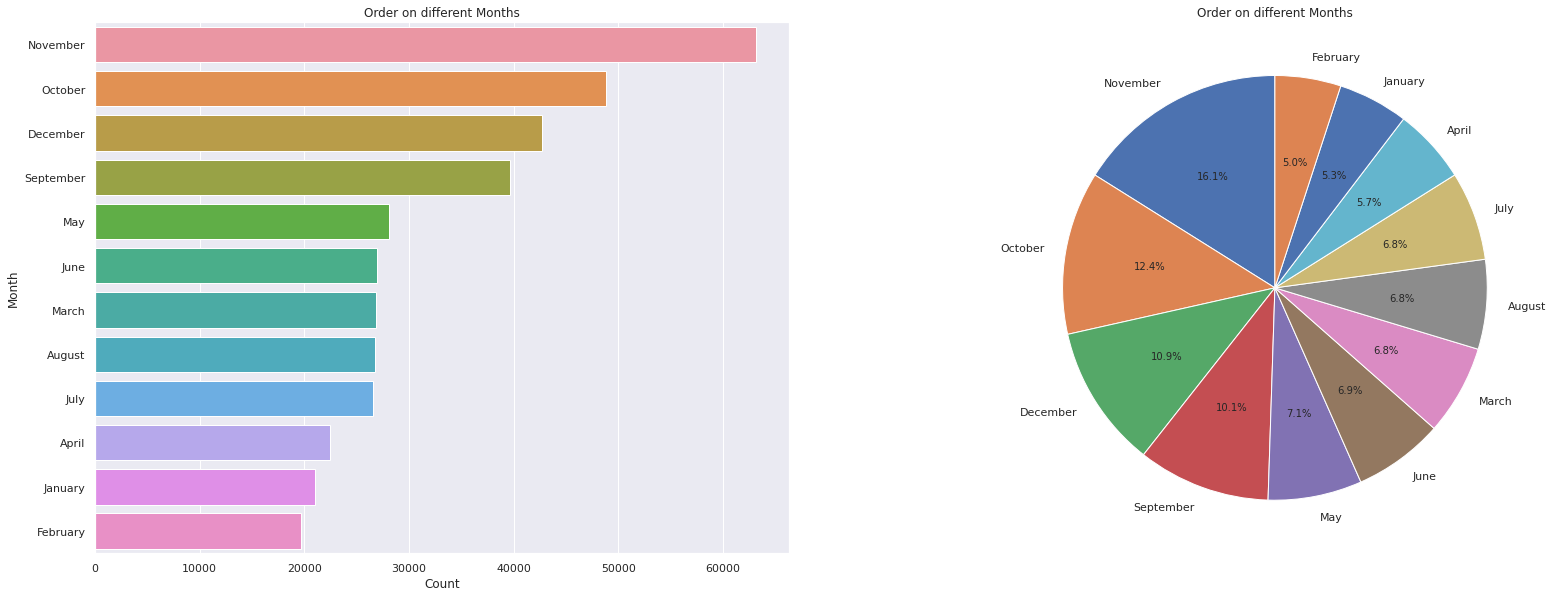

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
fig.tight_layout()
plt.subplot(1,2,1)
ax = sns.barplot(x='Count',y='Month',data=month_df)
plt.title('Order on different Months')

plt.subplot(1,2,2)
plt.pie(month_df['Count'],labels=month_df['Month'],startangle=90,autopct='%1.1f%%')
plt.title('Order on different Months')

In [ ]:
hour_df = retail_df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index':'Hour','Hour':'Count'},inplace=True)

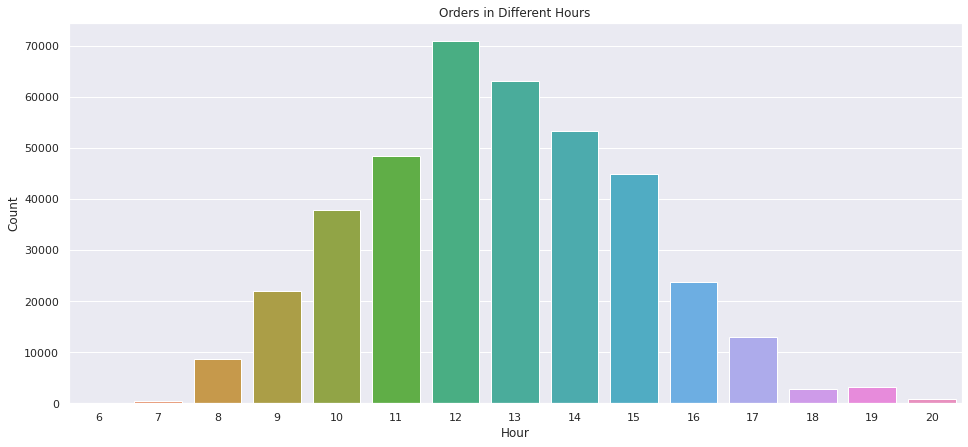

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(x=hour_df['Hour'],y=hour_df['Count'])
plt.title('Orders in Different Hours')
plt.show(
)

In [ ]:
# We can see mostly orders placed are in afternoon.

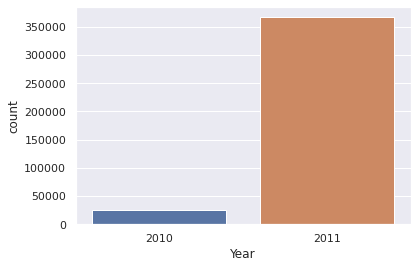

In [ ]:
sns.countplot(retail_df['Year'])

In [ ]:
country_df = retail_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country','Country':'Count'},inplace=True)
country_df.head(10)

,Country,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1453
9,Australia,1184


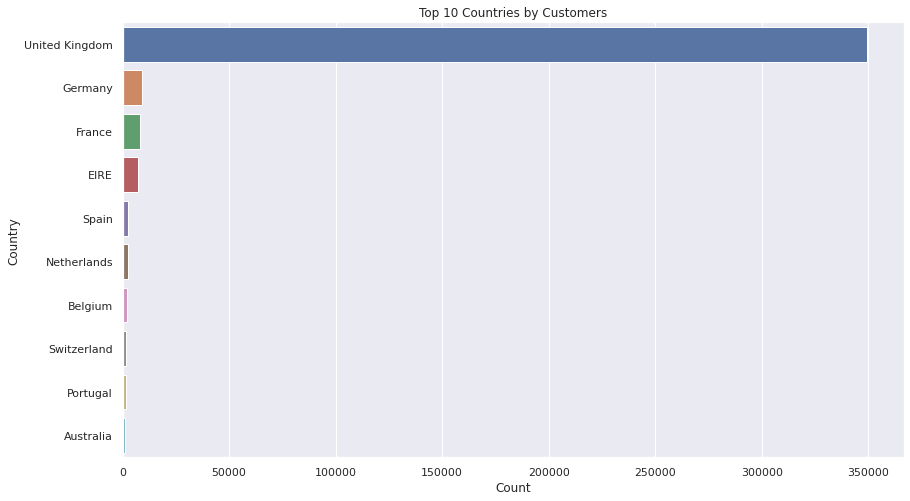

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Count',y='Country',data=country_df[:10])
plt.title('Top 10 Countries by Customers')
plt.show()

In [ ]:
  # checking if unit price has value less than zero

In [ ]:
retail_df[retail_df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Month,Hour,Minute


In [ ]:
# calculating total amount od the items
retail_df['TotalAmount'] = retail_df['Quantity']*retail_df['UnitPrice']

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Month,Hour,Minute,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,December,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,8,26,20.34


****Now creating the RFM model****

In [ ]:
latest_date = retail_df['InvoiceDate'].max() + pd.DateOffset(1)
rfm_df  = retail_df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (latest_date-x.max()).days,'InvoiceNo':lambda x: len(x),'TotalAmount':lambda x: x.sum()})
rfm_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetary'},inplace=True)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.215924
std,100.009747,225.515328,8984.248352
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,306.455000
50%,51.000000,41.000000,668.560000
75%,142.000000,98.000000,1660.315000
max,374.000000,7676.000000,280206.020000


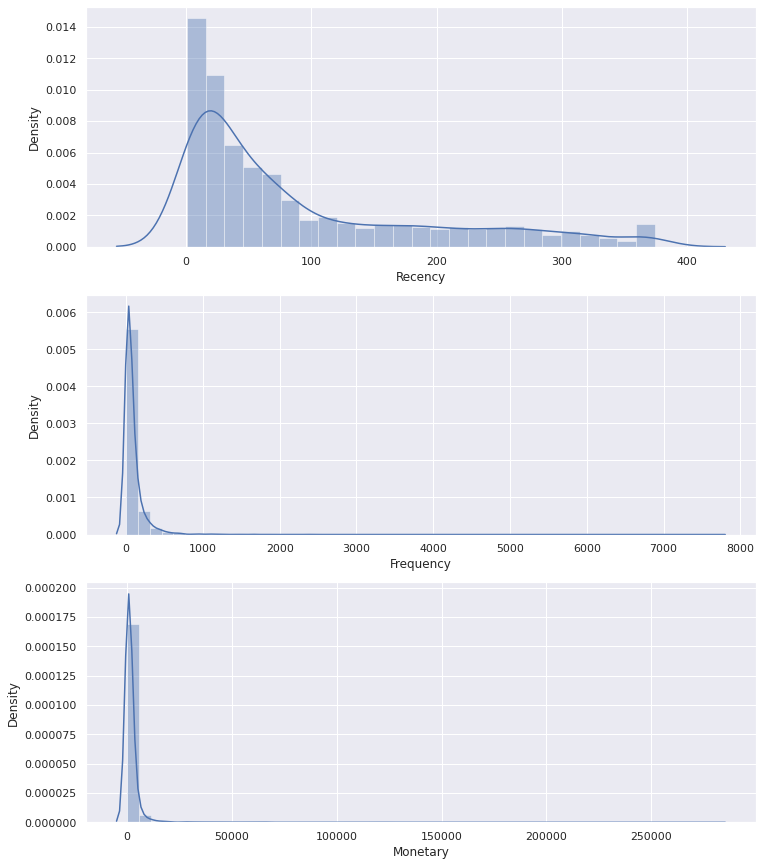

In [ ]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
sns.distplot(rfm_df['Recency'])
plt.subplot(3,1,2)
sns.distplot(rfm_df['Frequency'])
plt.subplot(3,1,3)
sns.distplot(rfm_df['Monetary'])


**Clustering algorithms requires normal distribution and we can see above those variables are not skewed so applying log transformation to deal with the skewness.**

In [ ]:
# handling negative and zero values
def hand_neg(x):
  if x<=0:
    return 1
  else:
    return x

rfm_df['Monetary'] = [hand_neg(x) for x in rfm_df.Monetary]

In [ ]:
rfm_df['log_R'] = np.log(rfm_df.Recency)
rfm_df['log_F'] = np.log(rfm_df.Frequency)
rfm_df['log_M'] = np.log(rfm_df.Monetary)
rfm_df.head()

,Recency,Frequency,Monetary,log_R,log_F,log_M
CustomerID,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,2.944439,4.290459,7.471676
12350.0,310,17,334.40,5.736572,2.833213,5.812338


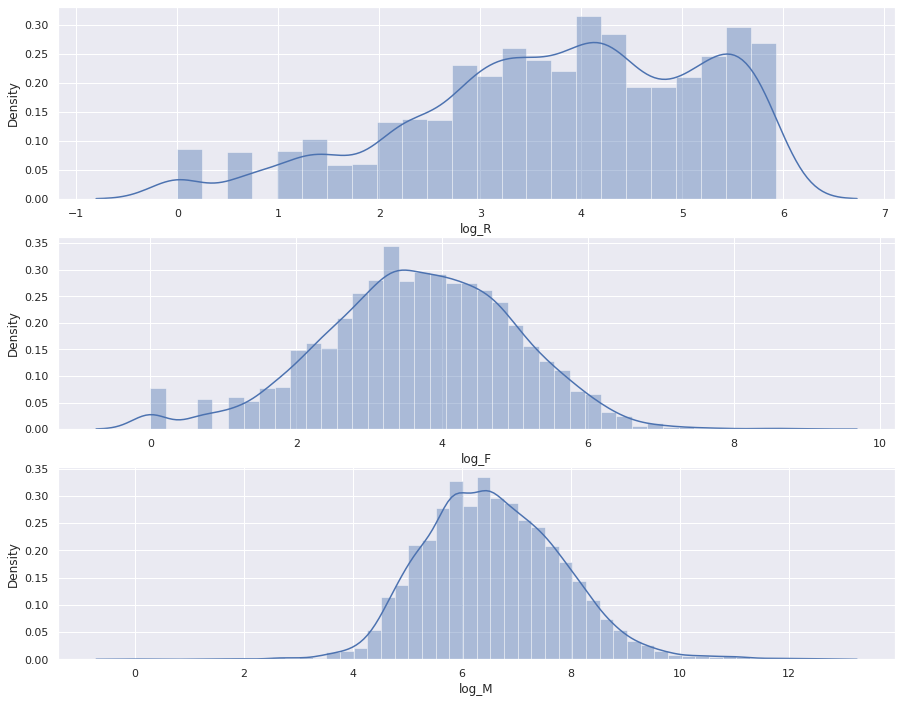

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
sns.distplot(rfm_df['log_R'])
plt.subplot(3,1,2)
sns.distplot(rfm_df['log_F'])
plt.subplot(3,1,3)
sns.distplot(rfm_df['log_M'])

In [ ]:
# splitting into quantiles
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315},
 'log_R': {0.25: 2.8903717578961645,
  0.5: 3.9318256327243257,
  0.75: 4.955827057601261},
 'log_F': {0.25: 2.833213344056216,
  0.5: 3.713572066704308,
  0.75: 4.584967478670572},
 'log_M': {0.25: 5.725070925540885,
  0.5: 6.505126145693181,
  0.75: 7.414762564483781}}

In [ ]:
# functions to create R, F, M values[
def Rscore(x,p,d):
  if x<=d[p][0.25]:
    return 1
  elif x<=d[p][0.50]:
    return 2
  elif x<=d[p][0.75]:
    return 3
  else:
    return 4

def FnMscore(x,p,d):
  if x<=d[p][0.25]:
    return  4
  elif x<=d[p][0.50]:
    return 3
  elif x<=d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
rfm_df['R'] = rfm_df['Recency'].apply(Rscore, args=('Recency',quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMscore,args=('Frequency',quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMscore,args=('Monetary',quantiles))

# creating score for rfm values
rfm_df['RFM_Group'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,Recency,Frequency,Monetary,log_R,log_F,log_M,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1,441,9
12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1,1,1,111,3
12348.0,75,31,1797.24,4.317488,3.433987,7.494007,3,3,1,331,7
12349.0,19,73,1757.55,2.944439,4.290459,7.471676,2,2,1,221,5
12350.0,310,17,334.40,5.736572,2.833213,5.812338,4,4,3,443,11


In [ ]:
# now plotting elbow plot to find optimal number of clusters
from sklearn.cluster import KMeans
normalized_data = rfm_df[['log_R','log_F','log_M']]
sum_of_squared_dist = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k, random_state=0, max_iter=10000)
  kmeans.fit(normalized_data)
  sum_of_squared_dist[k] = kmeans.inertia_

sum_of_squared_dist

{1: 23426.26113388688,
 2: 12498.686867275655,
 3: 9666.358675055562,
 4: 7977.263731980211,
 5: 6792.563295667924,
 6: 6043.108152025532,
 7: 5455.836031230319,
 8: 4996.781458461179,
 9: 4648.200842243266,
 10: 4371.041011543496,
 11: 4104.693197239415,
 12: 3848.0343423478353,
 13: 3633.926410841247,
 14: 3471.1414323002464}

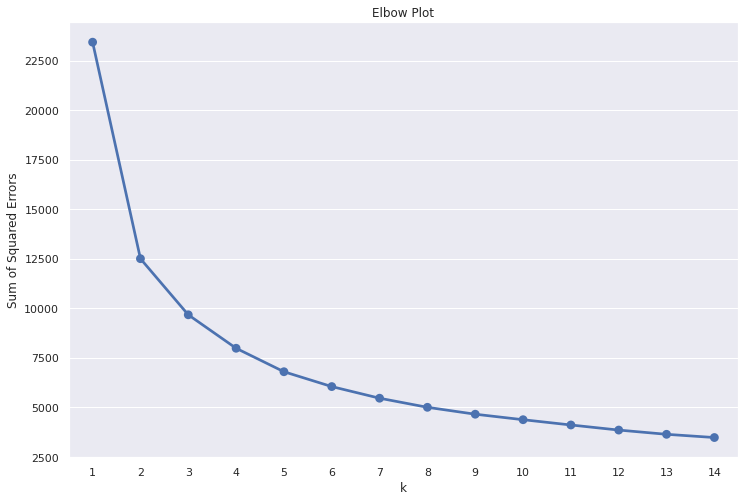

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Elbow Plot')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
sns.pointplot(x=list(sum_of_squared_dist.keys()),y=list(sum_of_squared_dist.values()))
plt.show()

In [ ]:
# so we can take optimal number of clusters as 2

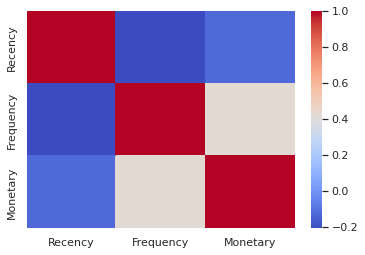

In [ ]:
sns.heatmap(rfm_df[['Recency','Frequency','Monetary']].corr(),cmap='coolwarm')

In [ ]:
# we cans see there is some correlation in frquency and monetary

In [ ]:
# plotting dindrogram to find optimal number of clusters

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_features = normalized_data.values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_features)

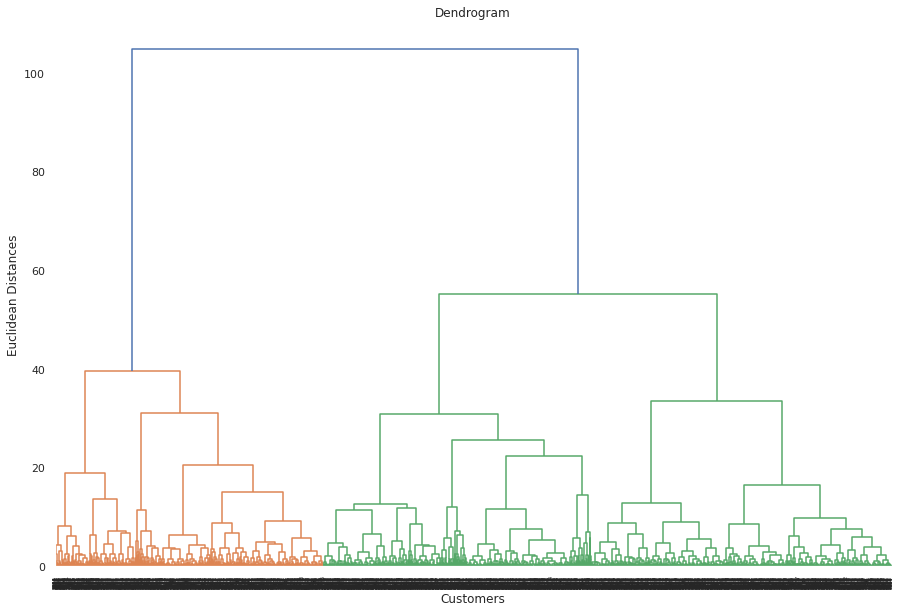

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

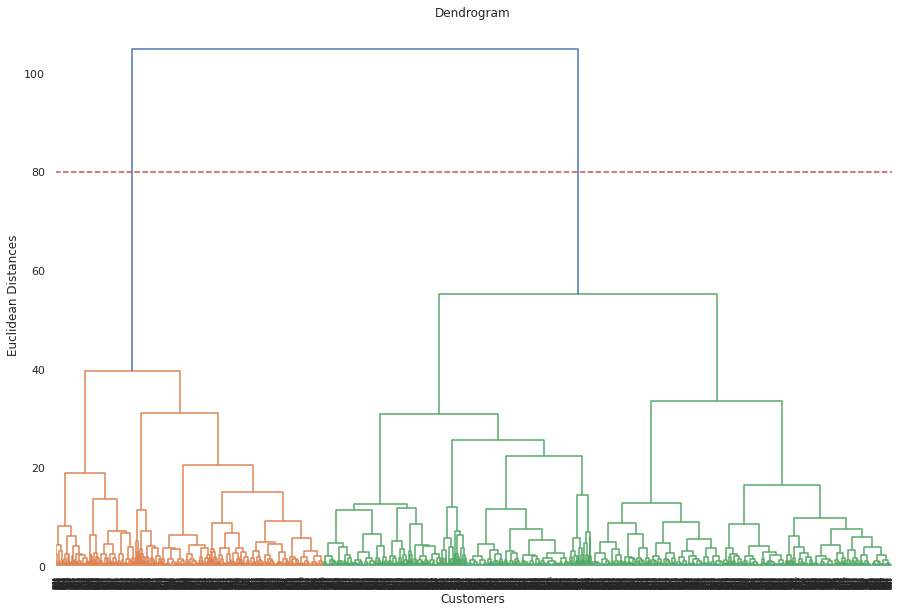

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80,color='r',linestyle='--')
plt.show()

In [ ]:
# we can see number of clusters we can take is 2

In [ ]:
# applying Silhouette method on Recency, Frequency and Monetary

In [ ]:
from sklearn.metrics import silhouette_score
range_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_of_clusters:
  kmeans = KMeans(n_clusters=n_clusters,random_state=1)
  y_predict = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X,y_predict)
  print('For number of clusters=',n_clusters,'The average Silhouette Score is :',silhouette_avg)

For number of clusters= 2 The average Silhouette Score is : 0.39469123089738556
For number of clusters= 3 The average Silhouette Score is : 0.3036651169410563
For number of clusters= 4 The average Silhouette Score is : 0.30293733227034814
For number of clusters= 5 The average Silhouette Score is : 0.27792536841180293
For number of clusters= 6 The average Silhouette Score is : 0.27686874880536927
For number of clusters= 7 The average Silhouette Score is : 0.26462661722385006
For number of clusters= 8 The average Silhouette Score is : 0.26227498541483096
For number of clusters= 9 The average Silhouette Score is : 0.251946063312162
For number of clusters= 10 The average Silhouette Score is : 0.2610496060167412
For number of clusters= 11 The average Silhouette Score is : 0.2672047325932877
For number of clusters= 12 The average Silhouette Score is : 0.26467791995646267
For number of clusters= 13 The average Silhouette Score is : 0.26244082904552357
For number of clusters= 14 The average Si

In [ ]:
# by seeing silhouette score we can take number of clusters as 2 or 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

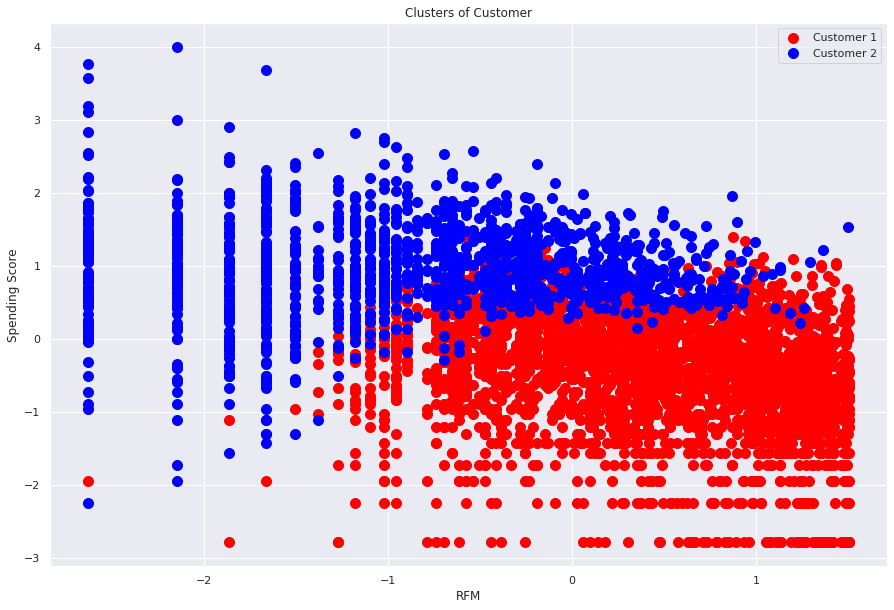

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Customer 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Customer 2')
plt.title('Clusters of Customer')
plt.xlabel('RFM')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

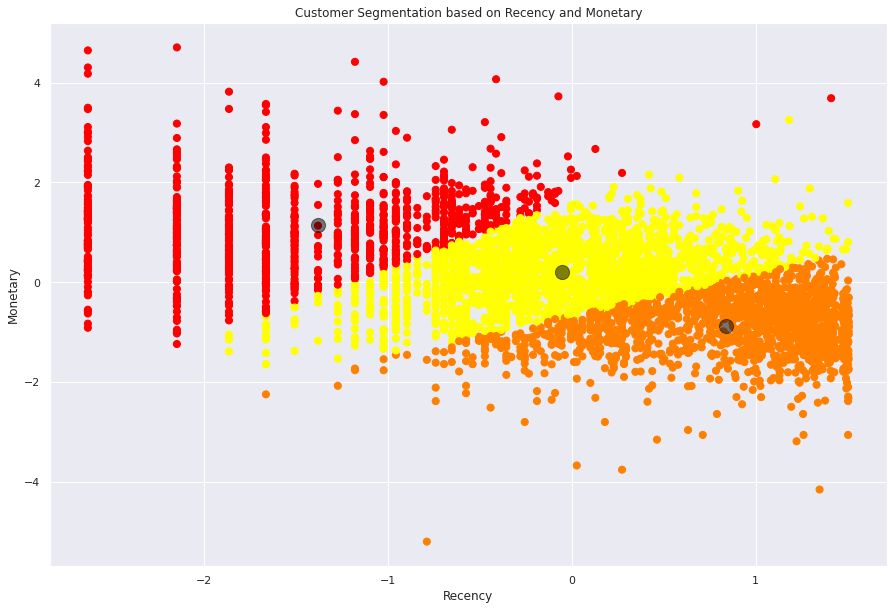

In [ ]:
rec_mon = ['log_R','log_M']
features_rec_mon = rfm_df[rec_mon].values
scaler_rnm = preprocessing.StandardScaler()
X = scaler_rnm.fit_transform(features_rec_mon)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X
                          )
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='autumn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],s=200,c='black',alpha=0.5)
plt.title('Customer Segmentation based on Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
# we can see higher the Recency lower the Monetary

Text(0, 0.5, 'Monetary')

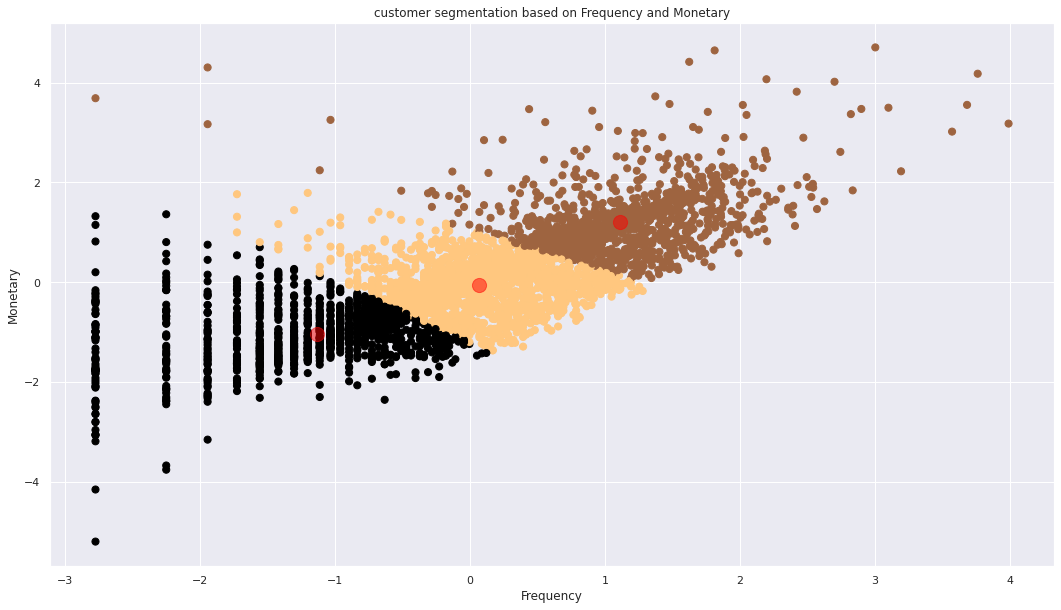

In [ ]:
freq_mon=['log_F','log_M']
features_freq_mon=rfm_df[freq_mon].values
scaler_freq_mon=preprocessing.StandardScaler()
X=scaler_freq_mon.fit_transform(features_freq_mon)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(18,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='copper')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')

In [ ]:
# we can see cluster1 indicates high customer values, cluster2 indicates average customer values, cluster3 indicates low customer values 